Ref: website => https://www.linkedin.com/pulse/introduction-exploratory-data-analysis-kaushik-mani

Ref: website => https://medium.com/geekculture/cluster-analysis-on-adult-dataset-9ac3e8263aff

### Required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Download dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
           "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
#data = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace =True)
data = pd.read_csv(url, names=columns)

### Exploring data

In [ ]:
data.head()

age         work-class  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

####Basic information

In [ ]:
# Age Statistics
print("Age Statistics")
print(data['age'].describe())
print("Median Age: ", data['age'].median())

Age Statistics
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64
Median Age:  37.0


#### Check missing information

In [ ]:
#To see the frequency list of each column to understand which columns include '?' as a value.
data.loc[data['native-country'].str.contains('\?')].head(10)

age  work-class  fnlwgt      education  education-num  \
14    40     Private  121772      Assoc-voc             11   
38    31     Private   84154   Some-college             10   
51    18     Private  226956        HS-grad              9   
61    32           ?  293936        7th-8th              4   
93    30     Private  117747        HS-grad              9   
245   56     Private  203580        HS-grad              9   
249   45     Private  153141        HS-grad              9   
297   39           ?  157443        Masters             14   
393   34   State-gov   98101      Bachelors             13   
453   42     Private  197583     Assoc-acdm             12   

             marital-status        occupation    relationship  \
14       Married-civ-spouse      Craft-repair         Husband   
38       Married-civ-spouse             Sales         Husband   
51            Never-married     Other-service       Own-child   
61    Married-spouse-absent                 ?   Not-in-family   
93       Married-civ-spouse             Sales            Wife   
245      Married-civ-spouse      Adm-clerical         Husband   
249      Married-civ-spouse      Adm-clerical         Husband   
297      Married-civ-spouse                 ?            Wife   
393      Married-civ-spouse   Exec-managerial         Husband   
453      Married-civ-spouse   Exec-managerial         Husband   

                    race      sex  capital-gain  capital-loss  hours-per-week  \
14    Asian-Pac-Islander     Male             0             0              40   
38                 White     Male             0             0              38   
51                 White   Female             0             0              30   
61                 White     Male             0             0              40   
93    Asian-Pac-Islander   Female             0          1573              35   
245                White     Male             0             0              35   
249                White     Male             0             0              40   
297   Asian-Pac-Islander   Female          3464             0              40   
393                White     Male          7688             0              45   
453                Black     Male             0             0              40   

    native-country  income  
14               ?    >50K  
38               ?    >50K  
51               ?   <=50K  
61               ?   <=50K  
93               ?   <=50K  
245              ?   <=50K  
249              ?   <=50K  
297              ?   <=50K  
393              ?    >50K  
453              ?    >50K

In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [ ]:
#Replace the na_value
data['occupation'] = data['occupation'].replace('na_value', 'Other-service')

In [ ]:
#Check frequency table again to be sure if there is '?', or not.
data['occupation'].value_counts()

occupation
Craft-repair         4091
Prof-specialty       4073
Exec-managerial      4024
Adm-clerical         3764
Sales                3625
Other-service        3293
Machine-op-inspct    2001
Transport-moving     1596
Handlers-cleaners    1369
Farming-fishing       994
Tech-support          927
Protective-serv       648
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [ ]:
#check ? in 'native-country'.
data['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                           29
Ecuador                          28
Ireland                          24
Hong                             20
Trinadad&Tobago                  19
Cambodia                         19
Thailand                         18
Laos                             18
Yugoslavia                       16
Outlying-US(Guam-USVI-etc)       14
Honduras                         13
Hungary                          13
Scotland                         12
Holand-Netherlands                1
Name: count, dtype: int64

In [ ]:
print(data.shape)

(32561, 15)


#### Visualization

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

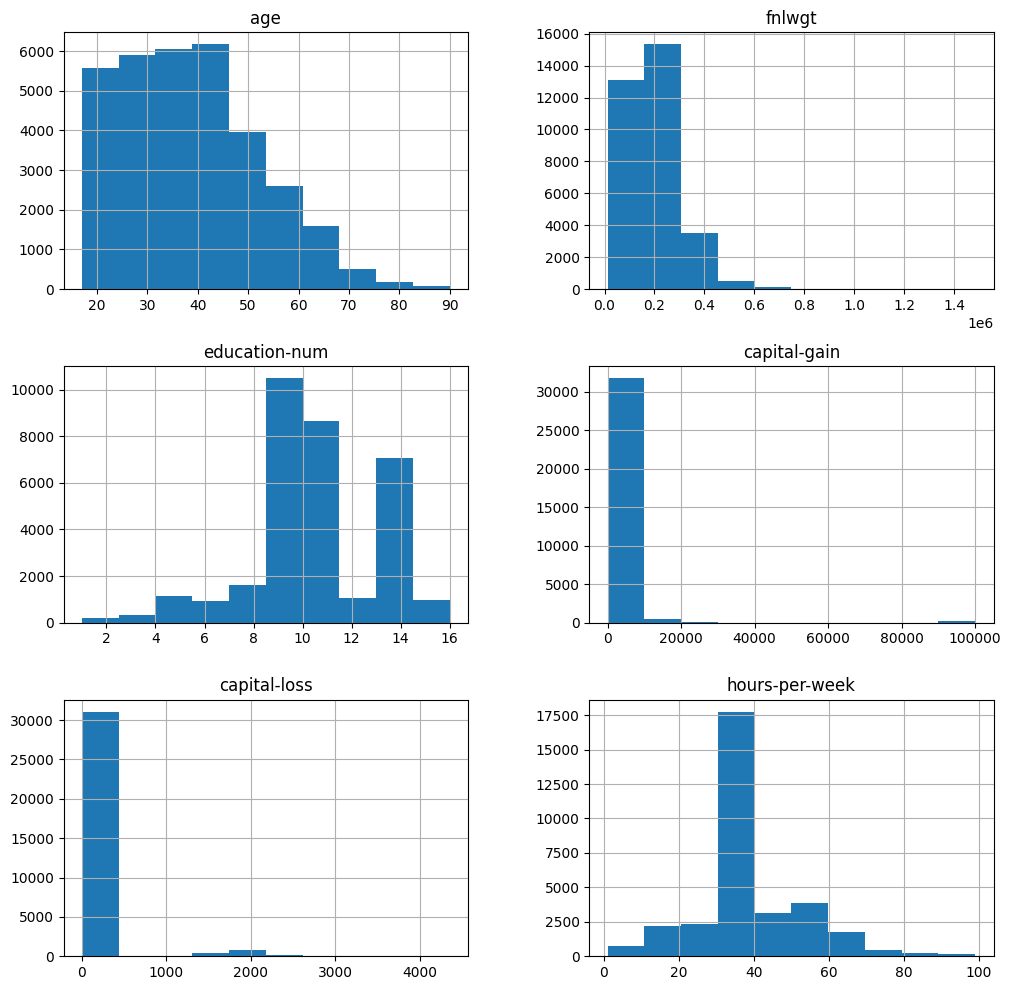

In [ ]:
#Plot histogram for numerical values.
numerical_attributes = data.select_dtypes(include=['int'])
numerical_attributes.hist(figsize=(12,12))

<Axes: xlabel='work-class', ylabel='count'>

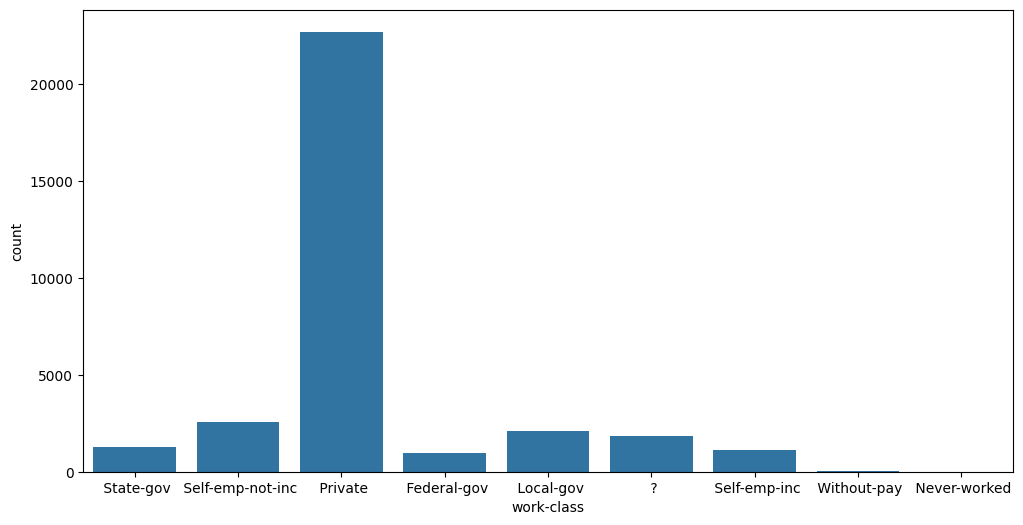

In [ ]:
#Plot histogram for categorical values (workclass).
# Plotting count plot for categorical values
categorical_attributes = data.select_dtypes(include=['object'])
# Work-class Count plot
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "work-class")

#### Handle outliers

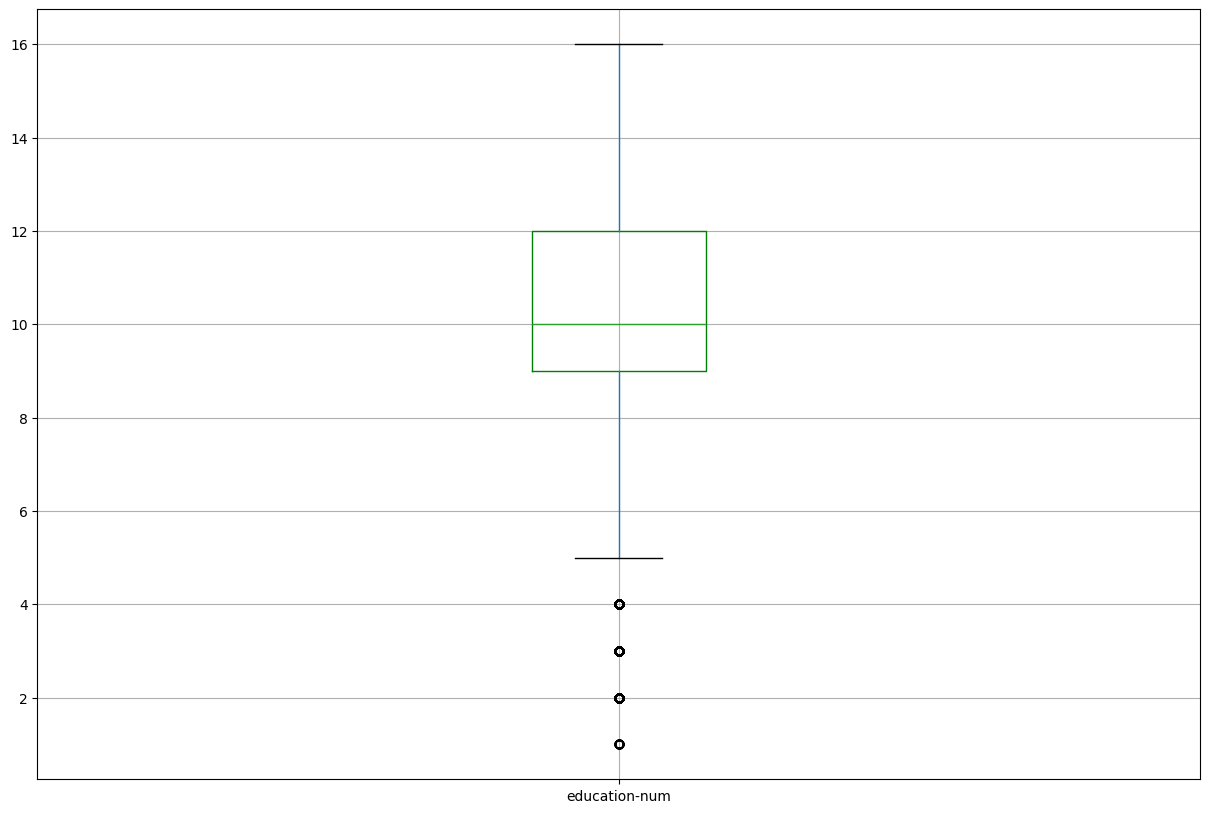

In [ ]:
#Boxplot for 'education-num'.
boxplot = data.boxplot(column=['education-num'],figsize=(15, 10),boxprops=dict(color='green'))

**Numeric** Outlier
This is the simplest, nonparametric outlier detection method in a one dimensional feature space. Here outliers are calculated by means of the IQR (InterQuartile Range).The first and the third quartile (Q1, Q3) are calculated. An outlier is then a data point x_i that lies outside the interquartile range. Using the interquartile multiplier value k=1, the range limits are the typical upper and lower whiskers of a box plot.

In [ ]:
#Write a function to calculate IOR for each numerical attribute and show skewness
def detection_outlier(dfcolumn):
 #Calculate Q1, Q3 and IQR
  Q1 = dfcolumn.quantile(0.25)
  Q3 = dfcolumn.quantile(0.75)
  IQR = Q3-Q1 #Interquartile range
 #In general, constant should be 1.
  lower  = Q1-1*IQR
  higher = Q3+1*IQR
 #Find number of outliers for specific column
  print('Before data preprocessing:')
  print('Skewness:',dfcolumn.skew())
  print(dfcolumn.describe())
  dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
  print('After replacing outliers by mean:')
  print('Skewness:',dfcolumn.skew())
  print('Median:',dfcolumn.median())
  print('IQR value:',IQR)
  print('Lower,Higher:',lower,',',higher)
  return

In [ ]:
detection_outlier(data['education-num'])

Before data preprocessing:
Skewness: -0.3116758679102297
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64
After replacing outliers by mean:
Skewness: 0.3841401825920038
Median: 10.0
IQR value: 3.0
Lower,Higher: 6.0 , 15.0


/tmp/ipython-input-1758779217.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
/tmp/ipython-input-1758779217.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.0806793403151' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()


#### Relationships among the attributes.

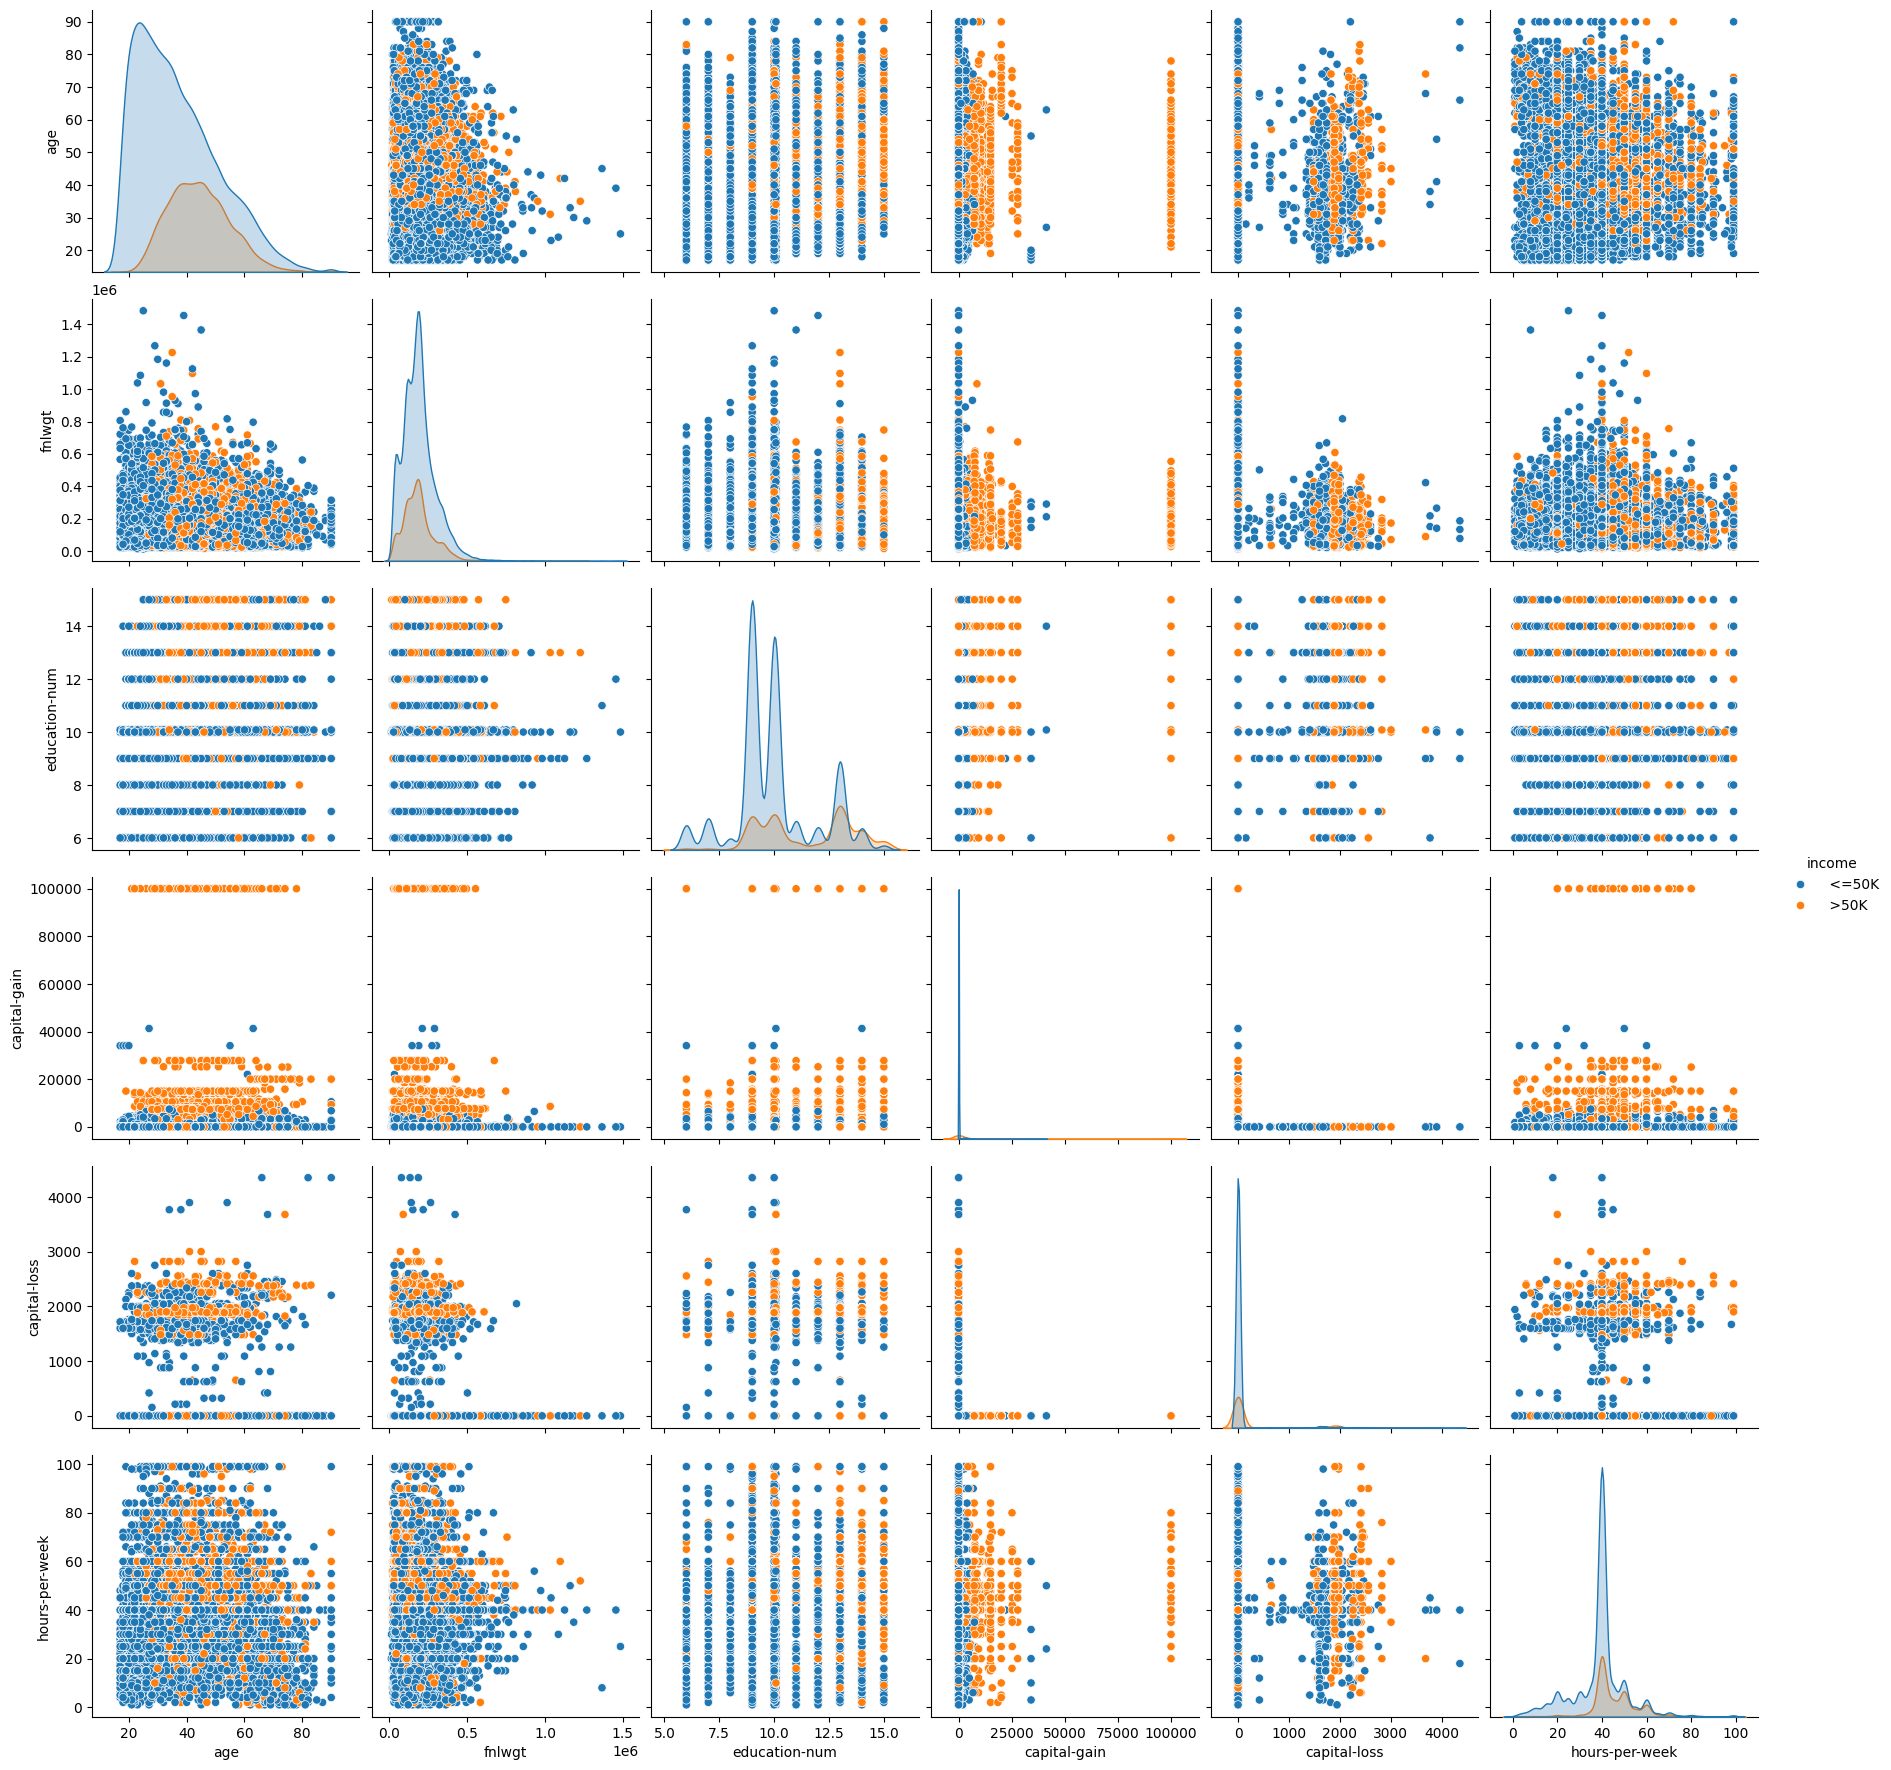

In [ ]:
sns.pairplot(data, height=3, diag_kind = 'kde', hue='income')

#### Correlation heatmap

Text(0.5, 1.05, 'Pearson Correlation of Features')

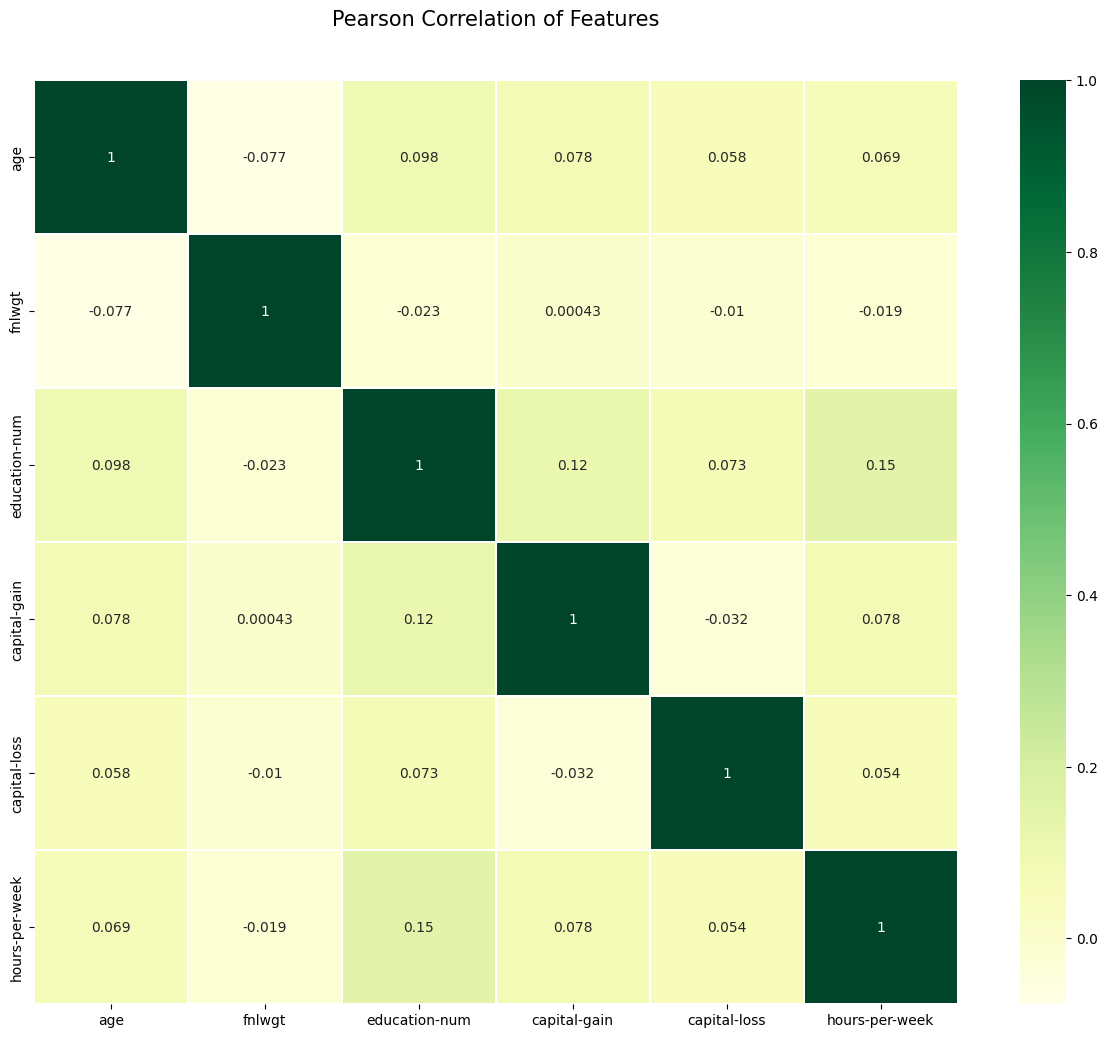

In [ ]:
# Compute the correlation matrix
numerical_data = data.select_dtypes(include=np.number) # Select only numerical columns
corr = numerical_data.corr()  # Calculate correlation on numerical data
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

#### Chi-square

Chi2: 
 41676.64797359809
The p-value of the test:
 0.0


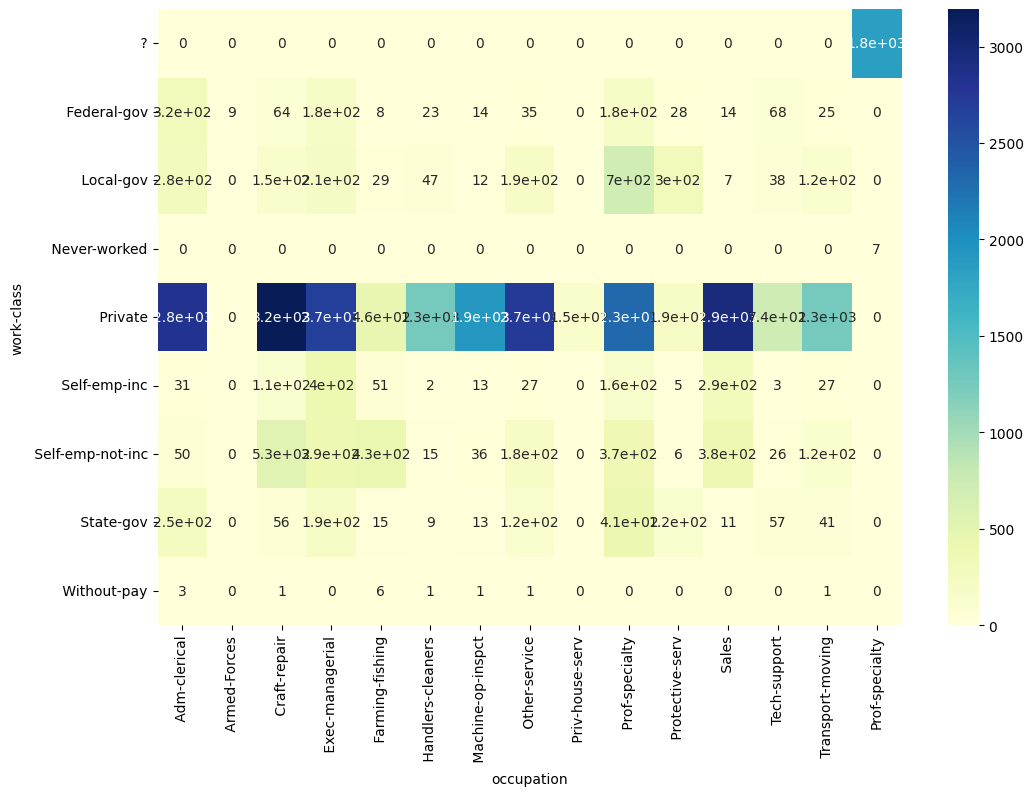

In [ ]:
from scipy.stats import chi2_contingency

contigency= pd.crosstab(categorical_attributes['work-class'], categorical_attributes['occupation'])
contigency_pct = pd.crosstab(categorical_attributes['work-class'], categorical_attributes['occupation'], normalize='index')

plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

c, p, dof, expected = chi2_contingency(contigency)
print('Chi2: \n',c)
print('The p-value of the test:\n',p)

#### Cross tabulation

In [ ]:
pd.crosstab(data['work-class'],data['sex'], margins=True)

sex                 Female   Male    All
work-class                              
 ?                     839    997   1836
 Federal-gov           315    645    960
 Local-gov             835   1258   2093
 Never-worked            2      5      7
 Private              7752  14944  22696
 Self-emp-inc          135    981   1116
 Self-emp-not-inc      399   2142   2541
 State-gov             489    809   1298
 Without-pay             5      9     14
All                  10771  21790  32561

#### Box plot

<Axes: xlabel='work-class', ylabel='age'>

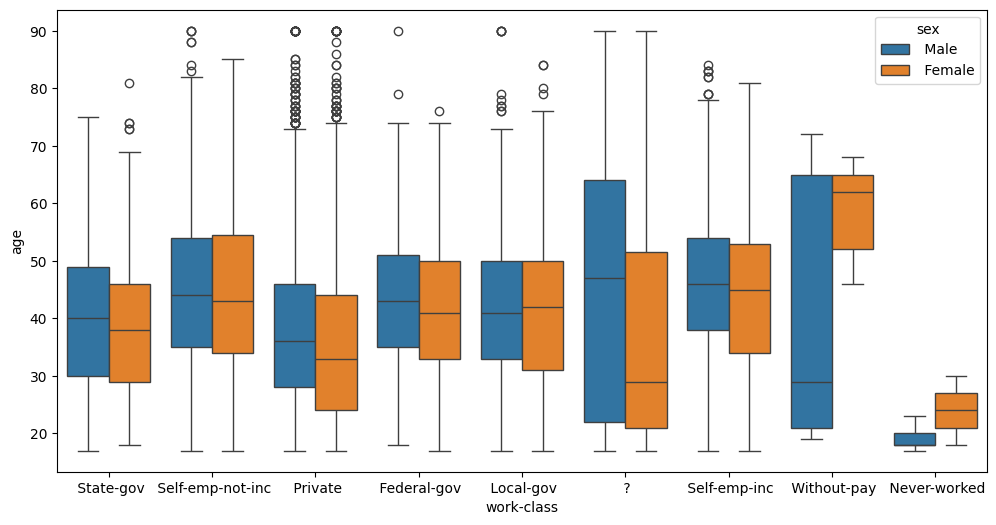

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="work-class",y="age", hue="sex", data=data)

#### Group table

In [ ]:
columns = ["age", "work-class", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
           "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace =True)

/tmp/ipython-input-2819542846.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['education'].replace(education_mapping, inplace=True)


<Axes: xlabel='education', ylabel='count'>

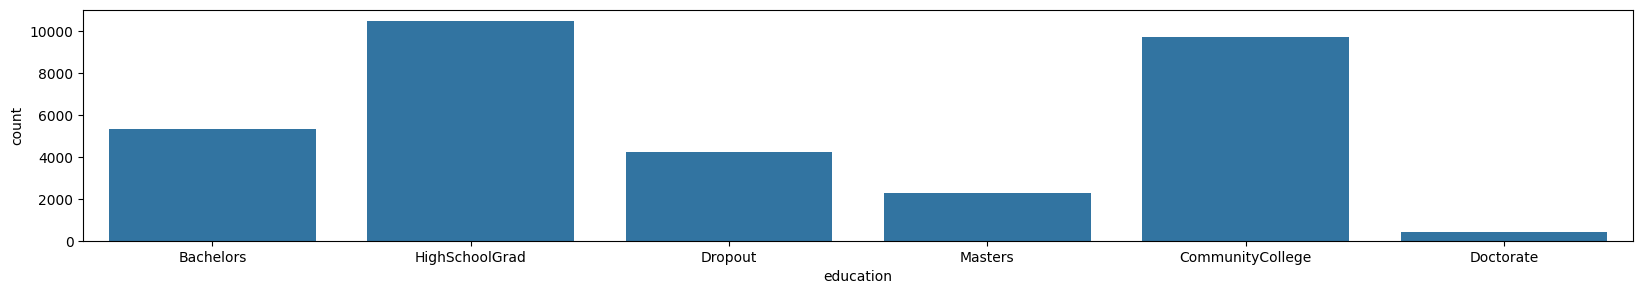

In [ ]:
# Grouping education (simplified and corrected replacement)
education_mapping = {
    'Preschool': 'Dropout', '10th': 'Dropout', '11th': 'Dropout', '12th': 'Dropout',
    '1st-4th': 'Dropout', '5th-6th': 'Dropout', '7th-8th': 'Dropout', '9th': 'Dropout',
    'HS-Grad': 'HighSchoolGrad', 'HS-grad': 'HighSchoolGrad',
    'Some-college': 'CommunityCollege', 'Assoc-acdm': 'CommunityCollege', 'Assoc-voc': 'CommunityCollege',
    'Prof-school': 'Masters'
}
data['education'].replace(education_mapping, inplace=True)

plt.figure(figsize=(20, 3))
sns.countplot(x="education", data=data)

<Axes: xlabel='native-country', ylabel='count'>

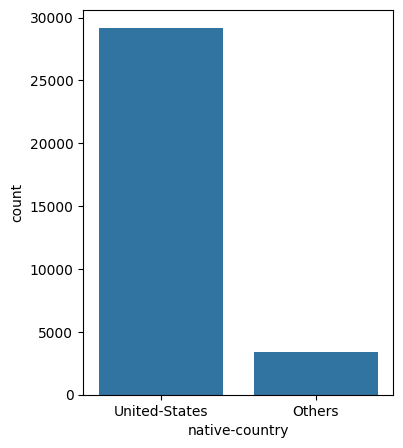

In [ ]:
# Grouping native-country
data['native-country'] = data['native-country'].apply(lambda el: "United-States" if el == "United-States" else "Others")
# Plotting count plot for native-country
fig = plt.figure(figsize=(4,5))
sns.countplot(x="native-country", data=data)

#### Dropping the missing values

In [ ]:
#Check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
print("missing value count for occupation ", data['occupation'].isnull().sum())
print("missing value count for work-class ", data['work-class'].isnull().sum())
print("missing value count for native-country ", data['native-country'].isnull().sum()) #before was 583

missing value count for occupation  1843
missing value count for work-class  1836
missing value count for native-country  0


In [ ]:
# Dropping missing values
data = data.dropna()
# Dropping outlier
i = data[data['capital-gain'] > 80000].index
data = data.drop(i)
# Dropping the column fnlwgt
data = data.drop(columns='fnlwgt')
# Combining capital-gain and capital-loss into 1 column
data['netcapitalgain'] = data.apply(lambda x: x['capital-gain'] + x['capital-loss'], axis=1)
data = data.drop(columns='capital-gain')
data = data.drop(columns='capital-loss')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30563 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30563 non-null  int64 
 1   work-class      30563 non-null  object
 2   education       30563 non-null  object
 3   education-num   30563 non-null  int64 
 4   marital-status  30563 non-null  object
 5   occupation      30563 non-null  object
 6   relationship    30563 non-null  object
 7   race            30563 non-null  object
 8   sex             30563 non-null  object
 9   hours-per-week  30563 non-null  int64 
 10  native-country  30563 non-null  object
 11  income          30563 non-null  object
 12  netcapitalgain  30563 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.3+ MB


In [ ]:
data.describe()

age  education-num  hours-per-week  netcapitalgain
count  30563.000000   30563.000000    30563.000000    30563.000000
mean      38.404312      10.115892       40.903151      693.863364
std       13.118141       2.554885       11.965517     2590.163958
min       17.000000       1.000000        1.000000        0.000000
25%       28.000000       9.000000       40.000000        0.000000
50%       37.000000      10.000000       40.000000        0.000000
75%       47.000000      13.000000       45.000000        0.000000
max       90.000000      16.000000       99.000000    41310.000000

In [ ]:
# Compute the correlation matrix
numerical_data = data.select_dtypes(include=np.number) # Select only numerical columns
corr = numerical_data.corr()  # Calculate correlation on numerical data
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

Text(0.5, 1.05, 'Pearson Correlation of Features')

#### Drop duplicat values

# Exercise - Iris dataset

In [ ]:
url_iris = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns_iris = ["sepal length", "sepal width", "petal length", "petal width", "class"]
data_iris = pd.read_csv(url_iris, names=columns_iris, sep=',', na_values='?', skipinitialspace =True)
data_iris.head()

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [ ]:
data_iris.describe()

sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [ ]:
setosa = data_iris[data_iris['class'] == "Iris-setosa"]
versi = data_iris[data_iris['class'] == 'Iris-versicolor']
virgi = data_iris[data_iris['class'] == "Iris-virginica"]


In [ ]:
setosa.describe()

sepal length  sepal width  petal length  petal width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

In [ ]:
versi.describe()

sepal length  sepal width  petal length  petal width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300000     3.000000      4.600000     1.500000
max        7.000000     3.400000      5.100000     1.800000

In [ ]:
virgi.describe()

sepal length  sepal width  petal length  petal width
count      50.00000    50.000000     50.000000     50.00000
mean        6.58800     2.974000      5.552000      2.02600
std         0.63588     0.322497      0.551895      0.27465
min         4.90000     2.200000      4.500000      1.40000
25%         6.22500     2.800000      5.100000      1.80000
50%         6.50000     3.000000      5.550000      2.00000
75%         6.90000     3.175000      5.875000      2.30000
max         7.90000     3.800000      6.900000      2.50000

In [ ]:
def detection_outlier(dfcolumn):
    # Calculate Q1, Q3 and IQR
    Q1 = dfcolumn.quantile(0.25)
    Q3 = dfcolumn.quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Set bounds for outliers
    lower = Q1 - 1.5 * IQR
    higher = Q3 + 1.5 * IQR

    # Find outliers
    outliers = dfcolumn[(dfcolumn > higher) | (dfcolumn < lower)]

    # Print info
    print('Before data preprocessing:')
    print('Skewness:', dfcolumn.skew())
    print(dfcolumn.describe())
    dfcolumn.median()

    print('\nOutlier values:')
    print(outliers)

    print('\nIQR value:', IQR)
    print('Lower bound:', lower, 'Higher bound:', higher)

    return outliers

## **Histogram**

<Axes: xlabel='sepal length', ylabel='Count'>

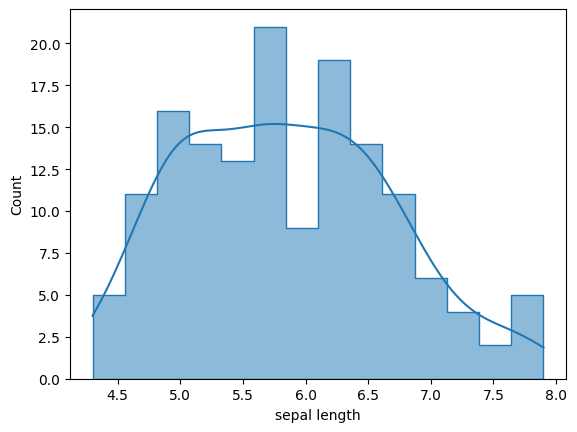

In [ ]:
sns.histplot(data = data_iris, x = 'sepal length', element = 'step', kde = True, binwidth= 0.25)

<Axes: xlabel='sepal width', ylabel='Count'>

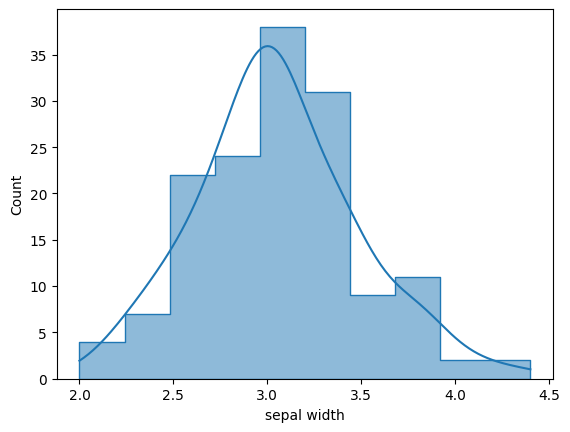

In [ ]:
sns.histplot(data = data_iris, x = 'sepal width', element = 'step', kde = True, binwidth= 0.25)

In [ ]:
sns.histplot(data = data_iris, x = 'petal length', element = 'step', kde = True, binwidth= 0.25)

<Axes: xlabel='petal length', ylabel='Count'>

In [ ]:
sns.histplot(data = data_iris, x = 'petal width', element = 'step', kde = True, binwidth= 0.1)

<Axes: xlabel='petal width', ylabel='Count'>

<Axes: xlabel='sepal length', ylabel='Count'>

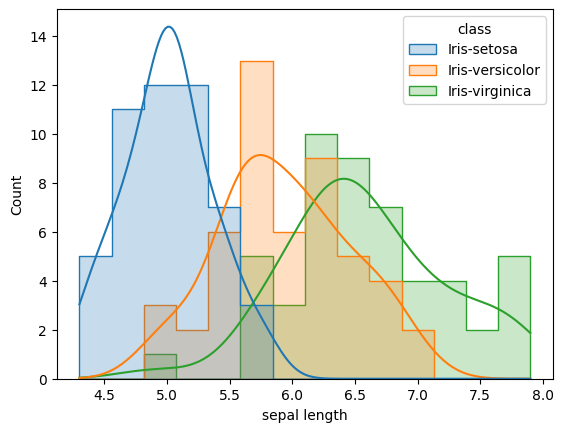

In [ ]:
sns.histplot(data = data_iris, x = 'sepal length', hue = 'class' ,element = 'step', kde = True, binwidth= 0.25)

In [ ]:
sns.histplot(data = data_iris, x = 'sepal width', hue = 'class' ,element = 'step', kde = True, binwidth= 0.25)

<Axes: xlabel='sepal width', ylabel='Count'>

In [ ]:
sns.histplot(data = data_iris, x = 'petal length', hue = 'class' ,element = 'step', kde = True, binwidth= 0.25)

<Axes: xlabel='petal length', ylabel='Count'>

<Axes: xlabel='petal width', ylabel='Count'>

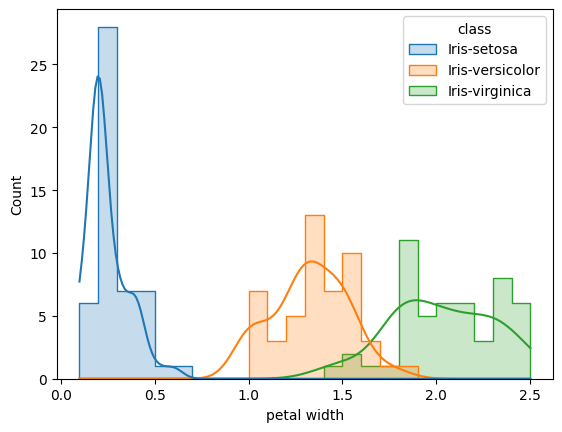

In [ ]:
sns.histplot(data = data_iris, x = 'petal width', hue = 'class' ,element = 'step', kde = True, binwidth= 0.1)

## **Boxplot**

<Axes: xlabel='class', ylabel='sepal length'>

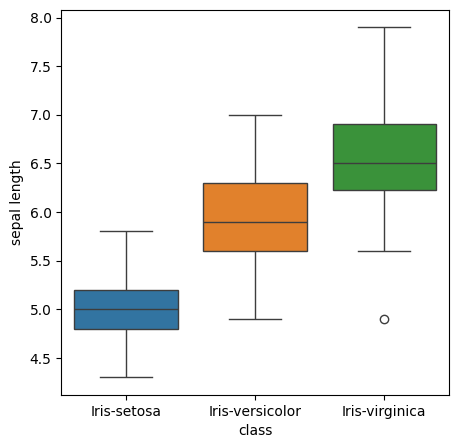

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x="class",y="sepal length", hue="class", data=data_iris, showfliers = True)

<Axes: xlabel='class', ylabel='sepal width'>

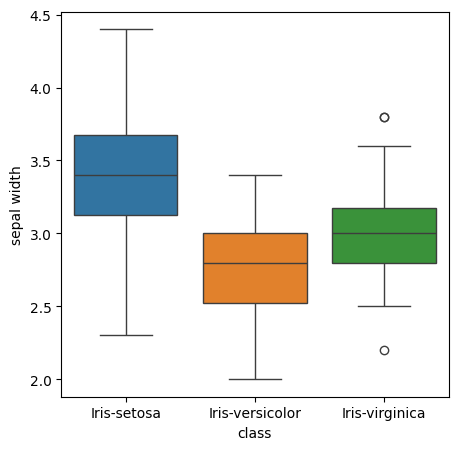

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x="class",y="sepal width", hue="class", data=data_iris, showfliers = True)

<Axes: xlabel='class', ylabel='petal length'>

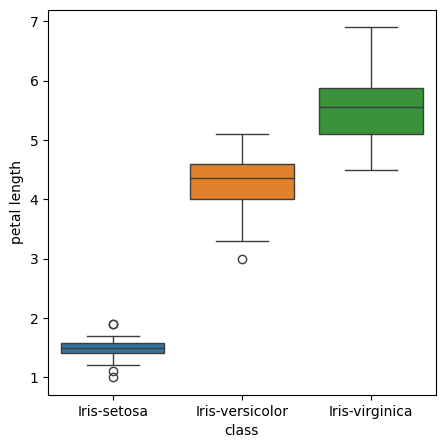

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x="class",y="petal length", hue="class", data=data_iris, showfliers = True)
# sns.swarmplot(x="class", y="petal length", data=data_iris, hue = 'class',color=".25")

<Axes: xlabel='class', ylabel='petal width'>

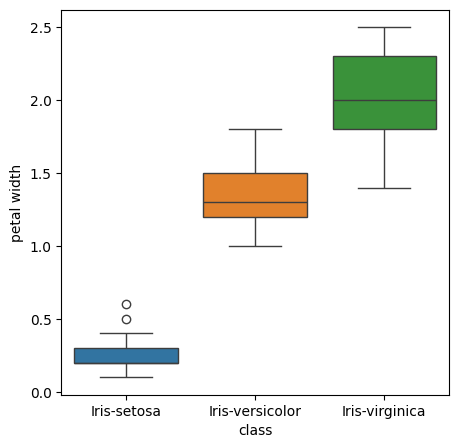

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x="class",y="petal width", hue="class", data=data_iris, showfliers = True)

In [ ]:
iris_types = {'setosa':setosa,'versicolor':versi, 'virginica': virgi}
cols = ['sepal length','sepal width', 'petal length', 'petal width']

for typ, it in iris_types.items():
  print("Type:",typ)
  for col in cols:
    detection_outlier(it[col])
    print("--------------------------------------")



Type: setosa
Before data preprocessing:
Skewness: 0.12008698599540611
count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal length, dtype: float64

Outlier values:
Series([], Name: sepal length, dtype: float64)

IQR value: 0.40000000000000036
Lower bound: 4.199999999999999 Higher bound: 5.800000000000001
--------------------------------------
Before data preprocessing:
Skewness: 0.10705281040086667
count    50.000000
mean      3.418000
std       0.381024
min       2.300000
25%       3.125000
50%       3.400000
75%       3.675000
max       4.400000
Name: sepal width, dtype: float64

Outlier values:
Series([], Name: sepal width, dtype: float64)

IQR value: 0.5500000000000003
Lower bound: 2.3 Higher bound: 4.500000000000001
--------------------------------------
Before data preprocessing:
Skewness: 0.07184613560973103
count    50.000000
mean      1.464000
std       0.173511
min       1.00

## **Correlational Matrix**

Text(0.5, 1.05, 'Pearson Correlation of Features')

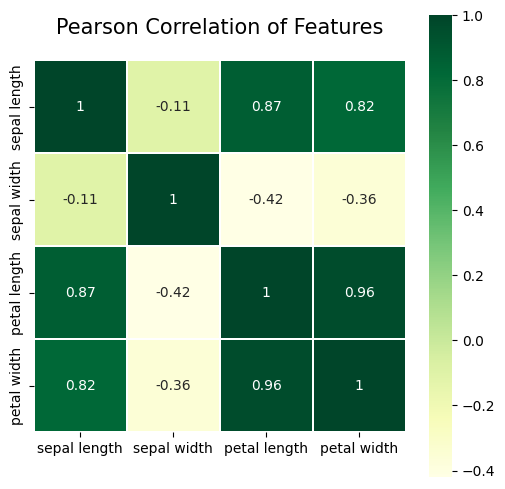

In [ ]:
numerical_data = data_iris.select_dtypes(include=np.number) # Select only numerical columns
corr = numerical_data.corr()  # Calculate correlation on numerical data
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

Text(0.5, 1.05, 'Pearson Correlation of Features')

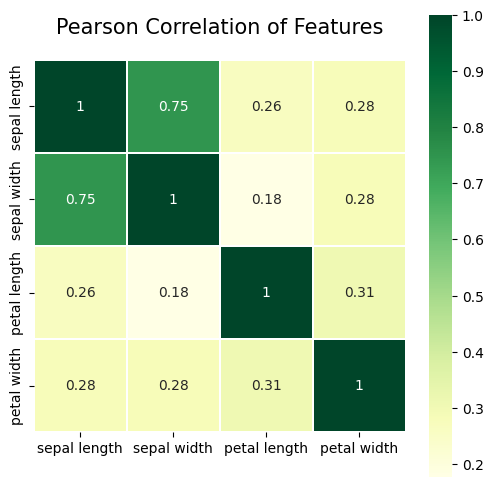

In [ ]:
numerical_data = setosa.select_dtypes(include=np.number) # Select only numerical columns
corr = numerical_data.corr()  # Calculate correlation on numerical data
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

Text(0.5, 1.05, 'Pearson Correlation of Features')

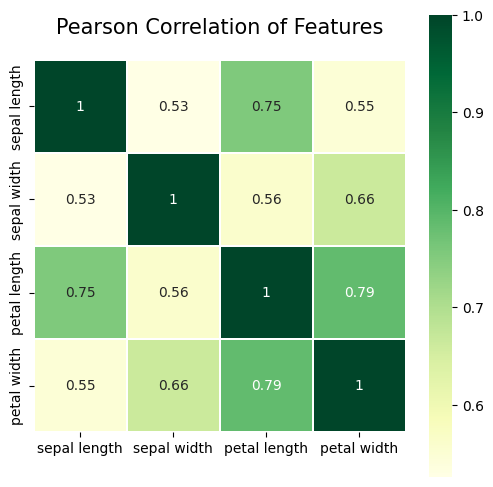

In [ ]:
numerical_data = versi.select_dtypes(include=np.number) # Select only numerical columns
corr = numerical_data.corr()  # Calculate correlation on numerical data
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

Text(0.5, 1.05, 'Pearson Correlation of Features')

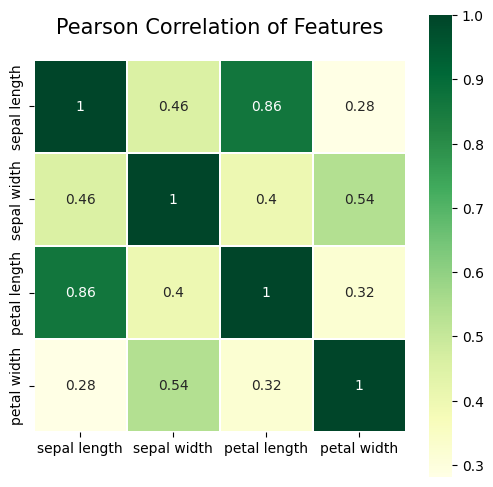

In [ ]:
numerical_data = virgi.select_dtypes(include=np.number) # Select only numerical columns
corr = numerical_data.corr()  # Calculate correlation on numerical data
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

## **Pairplot**

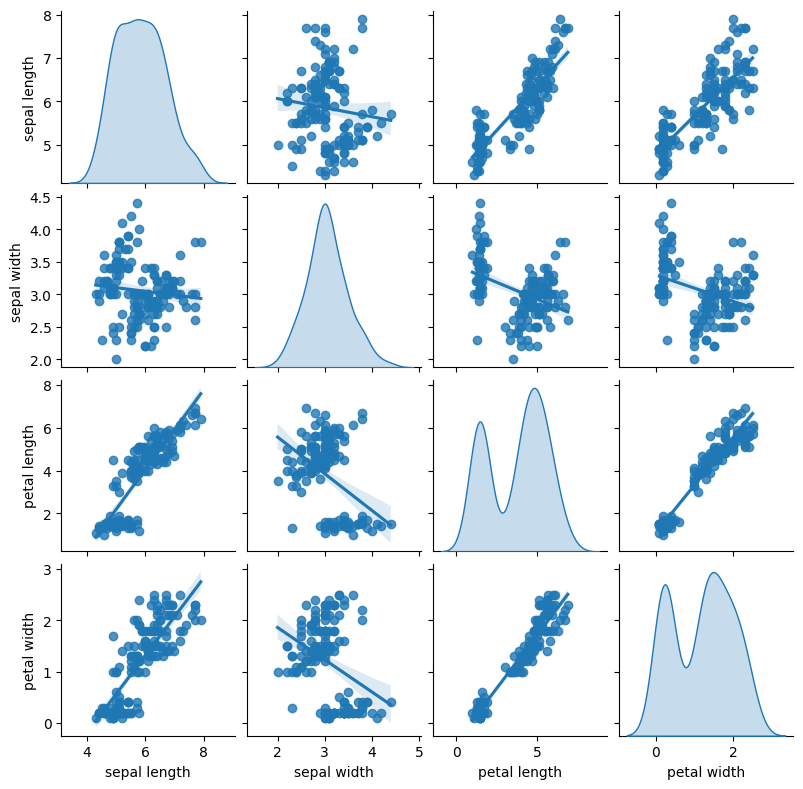

In [ ]:
sns.pairplot(data_iris, height=2, diag_kind = 'kde', kind = "reg")

In [ ]:
sns.pairplot(data_iris, height=2, diag_kind = 'kde', hue='class')

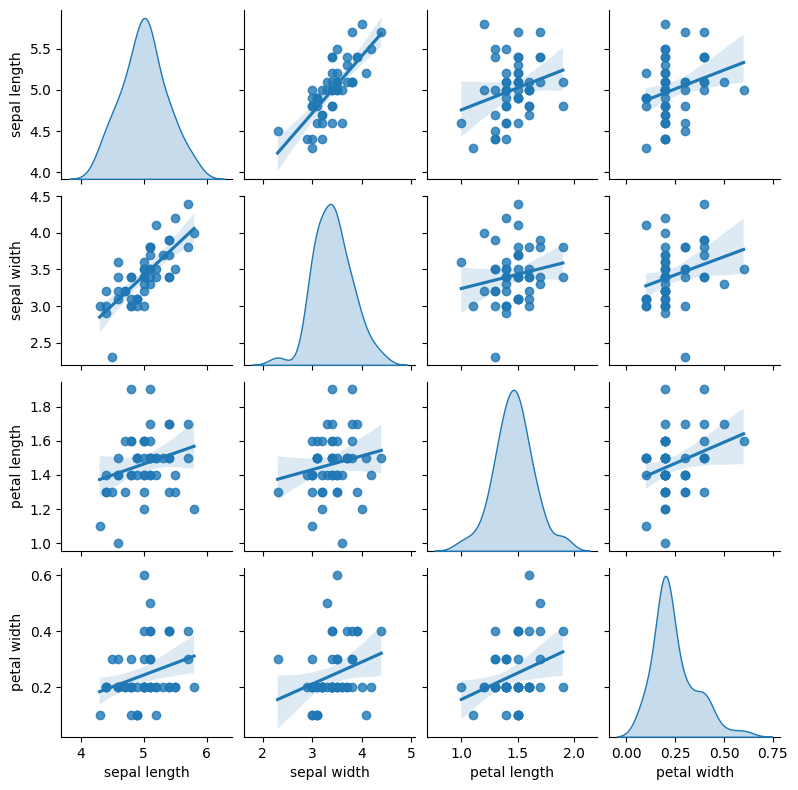

In [ ]:
sns.pairplot(setosa, height=2, diag_kind = 'kde', kind = "reg")

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


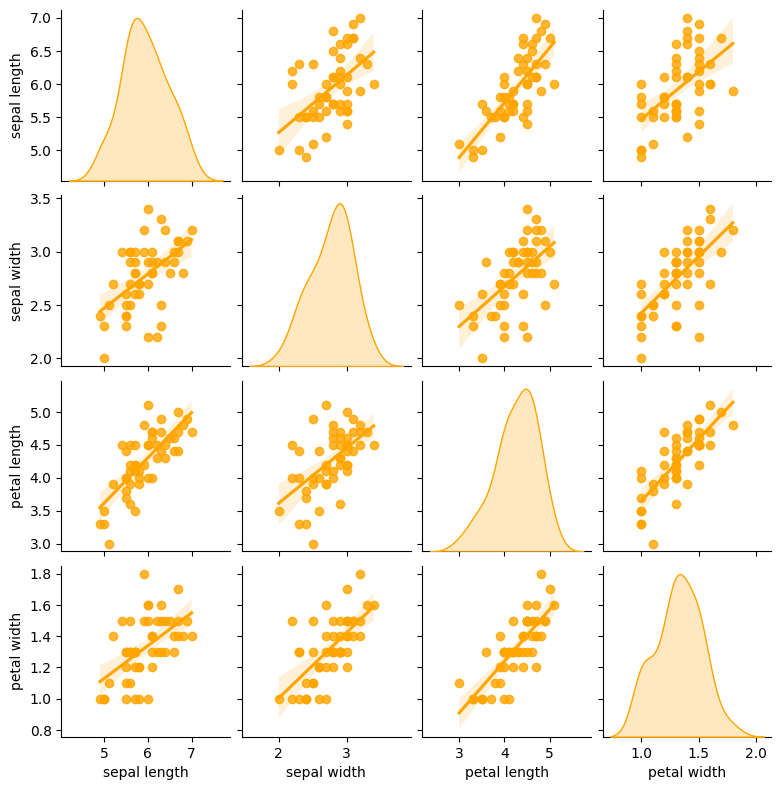

In [ ]:
sns.pairplot(versi, height=2, diag_kind = 'kde', kind = "reg",palette = "flare",plot_kws={'color':'orange'}, diag_kws ={'color':'orange'})


In [ ]:
sns.pairplot(virgi, height=2, diag_kind = 'kde', kind = "reg",plot_kws={'color': 'green'},diag_kws={'color':'green'})

In [ ]:
# compare between 2 classes
subset = data_iris[data_iris['class'].isin(['Iris-versicolor','Iris-virginica'])]

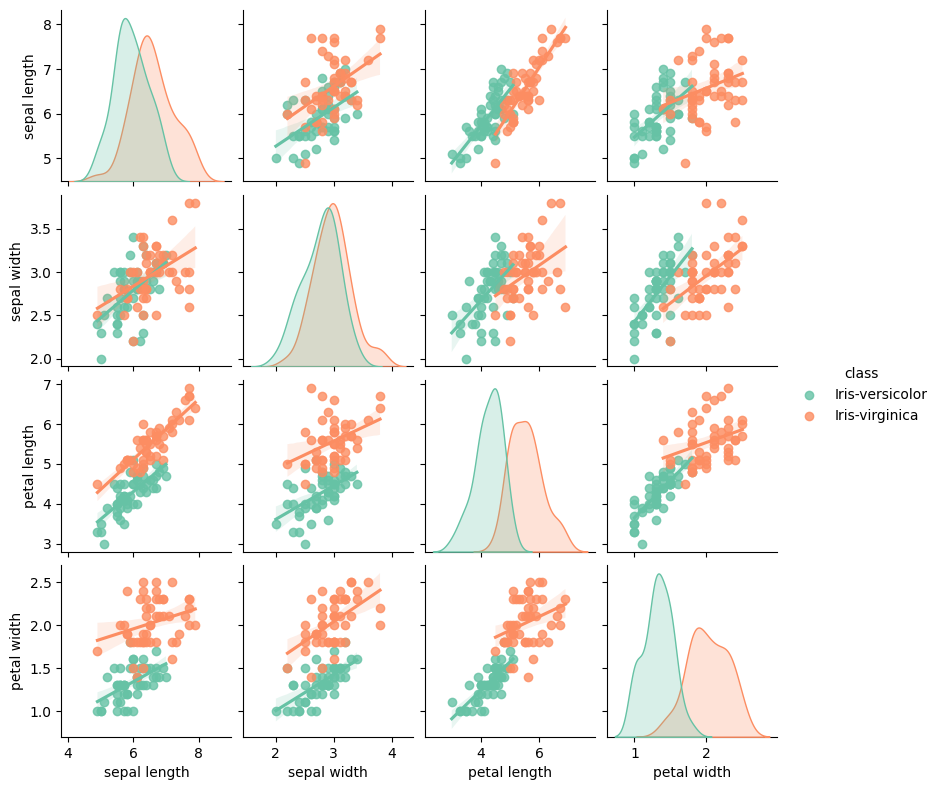

In [ ]:
sns.pairplot(subset, height=2, diag_kind = 'kde', hue='class',palette = "Set2", kind = "reg")

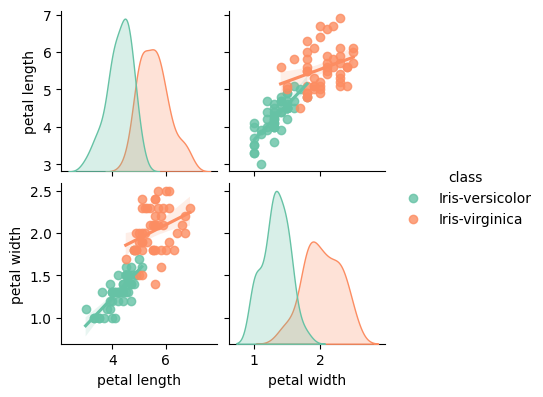

In [ ]:
sns.pairplot(subset, height=2,vars=['petal length','petal width'], diag_kind = 'kde', hue='class',palette = "Set2", kind = "reg")

## **Cross Tabulation**

In [ ]:
data_iris['sepal length group'] = pd.cut(data_iris['sepal length'], bins=3)

In [ ]:
ct = pd.crosstab(data_iris['class'], data_iris['sepal length group'])

In [ ]:
print(ct)

sepal length group  (4.296, 5.5]  (5.5, 6.7]  (6.7, 7.9]
class                                                   
Iris-setosa                   47           3           0
Iris-versicolor               11          36           3
Iris-virginica                 1          32          17


In [ ]:
data_iris['sepal width group'] = pd.cut(data_iris['sepal width'], bins=3)
ct_sw = pd.crosstab(data_iris['class'], data_iris['sepal width group'])


In [ ]:
print(ct_sw)

sepal width group  (1.998, 2.8]  (2.8, 3.6]  (3.6, 4.4]
class                                                  
Iris-setosa                   1          36          13
Iris-versicolor              27          23           0
Iris-virginica               19          29           2


In [ ]:
data_iris['petal length group'] = pd.cut(data_iris['petal length'], bins=[0.9,2.9,4.9,6.9])
ct_pl = pd.crosstab(data_iris['class'], data_iris['petal length group'])

In [ ]:
print(ct_pl)

petal length group  (0.9, 2.9]  (2.9, 4.9]  (4.9, 6.9]
class                                                 
Iris-setosa                 50           0           0
Iris-versicolor              0          48           2
Iris-virginica               0           6          44
